<a href="https://colab.research.google.com/github/disenodc/Doctorado_UNS/blob/main/TP1_casos_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 1 - Machine Learning
## Casos covid


In [164]:
# importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing 

El objetivo del trabajo es detectar 
1.1 ¿Hay variables que puedan ser razonablemente consideradas normales?
1.2 ¿Hay variables que tienen un comportamiento sospechoso?

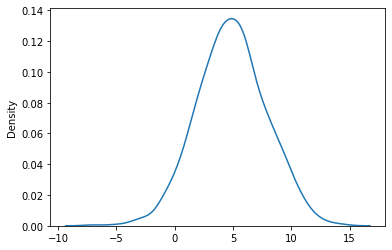

In [182]:
#Curva de distribucion Normal o Gaussiana
value = np.random.normal(loc=5,scale=3,size=1000)
sns.kdeplot(value)

In [ ]:
#cargo los datos de casos
casos_covid = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv", sep=",")
casos_covid

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


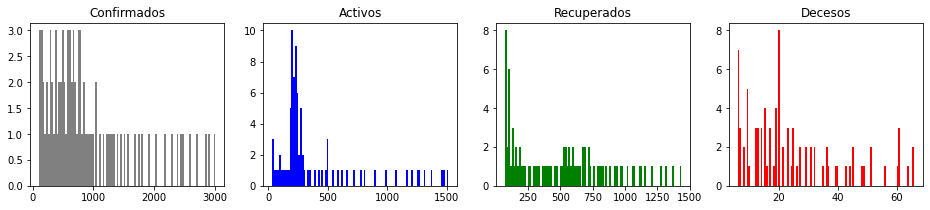

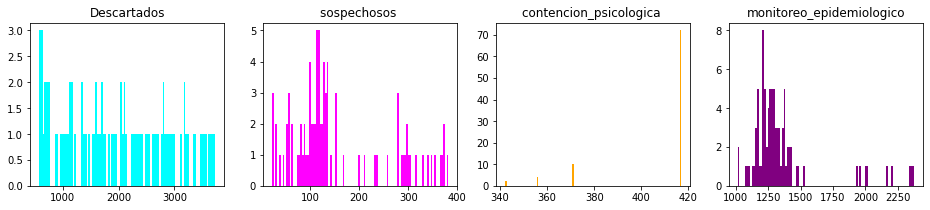

In [188]:
# Distribucion de casos

#casos de covid
fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title("Confirmados")
ax1.hist(casos_covid["confirmados"], bins=100, color="gray")

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title("Activos")
ax2.hist(casos_covid["activos"], bins=100, color="blue")

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title("Recuperados")
ax3.hist(casos_covid["recuperados"], bins=100, color="green")

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title("Decesos")
ax4.hist(casos_covid["decesos"], bins=100, color="red")



fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title("Descartados")
ax1.hist(casos_covid["descartados"], bins=100, color="cyan")

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title("sospechosos ")
ax2.hist(casos_covid["sospechosos"], bins=100, color='magenta')

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title("contencion_psicologica ")
ax3.hist(casos_covid["contencion_psicologica"], bins=100, color='orange')

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title("monitoreo_epidemiologico")
ax4.hist(casos_covid["monitoreo_epidemiologico"], bins=100, color='purple')


plt.show()

In [ ]:
#cargo los datos de camas covid Bahia blanca
camas_covid = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv", sep=",")
camas_covid

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


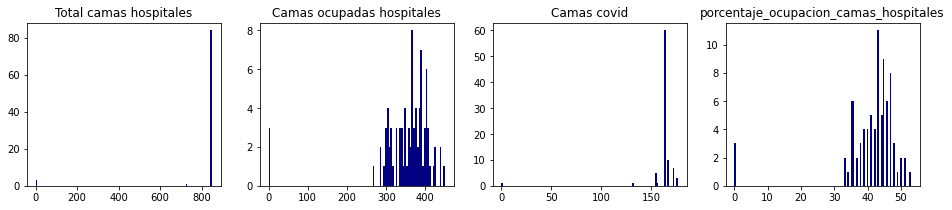

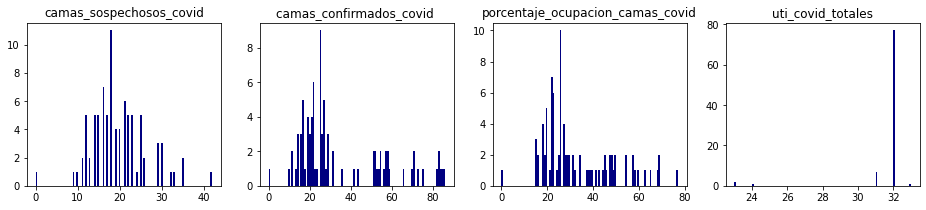

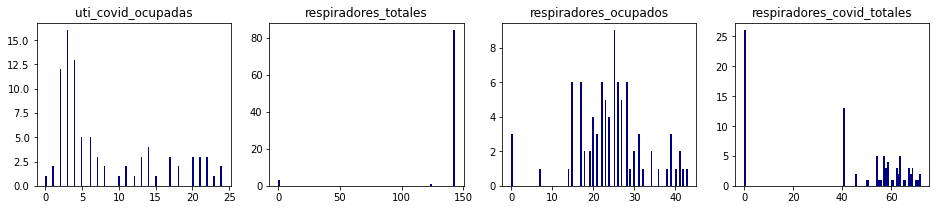

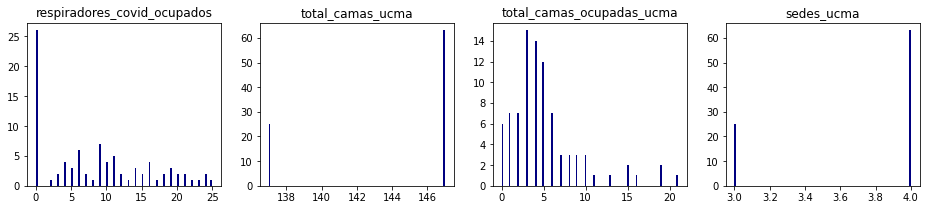

In [197]:
# Distribucion de camas covid


#camas de covid
fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title("Total camas hospitales")
ax1.hist(camas_covid["total_camas_hospitales"], bins=100, color="navy")

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title("Camas ocupadas hospitales")
ax2.hist(camas_covid["camas_ocupadas_hospitales"], bins=100, color="navy")

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title("Camas covid")
ax3.hist(camas_covid["camas_covid"], bins=100, color="navy")

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title("porcentaje_ocupacion_camas_hospitales")
ax4.hist(camas_covid["porcentaje_ocupacion_camas_hospitales"], bins=100, color="navy")

fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title("camas_sospechosos_covid")
ax1.hist(camas_covid["camas_sospechosos_covid"], bins=100, color="navy")

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title("camas_confirmados_covid ")
ax2.hist(camas_covid["camas_confirmados_covid"], bins=100, color="navy")

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title("porcentaje_ocupacion_camas_covid")
ax3.hist(camas_covid["porcentaje_ocupacion_camas_covid"], bins=100, color="navy")

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title("uti_covid_totales")
ax4.hist(camas_covid["uti_covid_totales"], bins=100, color="navy")


fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title("uti_covid_ocupadas")
ax1.hist(camas_covid["uti_covid_ocupadas"], bins=100, color="navy")

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title("respiradores_totales")
ax2.hist(camas_covid["respiradores_totales"], bins=100, color="navy")

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title("respiradores_ocupados")
ax3.hist(camas_covid["respiradores_ocupados"], bins=100, color="navy")

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title("respiradores_covid_totales")
ax4.hist(camas_covid["respiradores_covid_totales"], bins=100, color="navy")

 	 	 	

fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title("respiradores_covid_ocupados")
ax1.hist(camas_covid["respiradores_covid_ocupados"], bins=100, color="navy")

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title("total_camas_ucma")
ax2.hist(camas_covid["total_camas_ucma"], bins=100, color="navy")

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title("total_camas_ocupadas_ucma")
ax3.hist(camas_covid["total_camas_ocupadas_ucma"], bins=100, color="navy")

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title("sedes_ucma")
ax4.hist(camas_covid["sedes_ucma"], bins=100, color="navy")

plt.show()